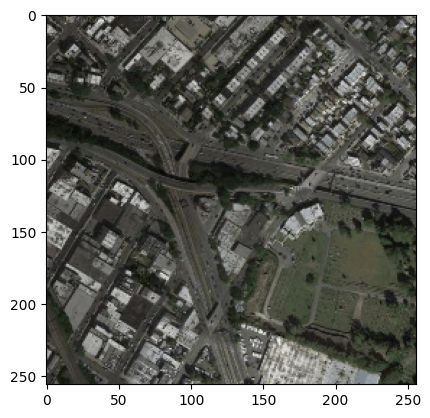

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

transform_only_input = A.Compose(
    [
        # A.HorizontalFlip(p=0.5),
        # A.ColorJitter(p=0.2),
        # A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
        # ToTensorV2(),
    ]
)

both_transform = A.Compose(
    [A.Resize(width=256, height=256),], additional_targets={"image0": "image"},
)

image_path = 'data/maps/maps/train/952.jpg'
image = Image.open(image_path)

image = np.array(image)


x = image[:, :600, :]
y = image[:, 600:, :]


aug = both_transform(image=x, image0=y)

x, y = aug['image'], aug['image0']

x = transform_only_input(image=x)['image']

x = x.reshape(256, 256, 3)
plt.imshow(x.squeeze())